In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Data Collection Reading Testdata and Train Data

titanic_data_train = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_data_test = pd.read_csv('/kaggle/input/titanic/test.csv')


# Data Analysis of Train Data

titanic_data_train.head()


#Data Wrangling Checking and Removing Unwanted Data and Null Values
#PassengerID, Name , Ticket,Fare, Cabin , Cab be removed as Cabin has Null values
#Out of 891 entries 687 have null values

titanic_data_train['Cabin'].isnull().sum()

titanic_data_train = titanic_data_train.drop(['Cabin','Name','Age','Ticket','Fare','Embarked','Pclass','SibSp','Parch','PassengerId'],axis=1)

#titanic_data_train = pd.get_dummies(titanic_data_train,columns=['Sex'])


titanic_data_train.Sex = [ 1 if each == 'male' else 0 for each in titanic_data_train.Sex]

X_train = titanic_data_train.drop(['Survived'], axis=1)

Y_train = titanic_data_train.Survived.values



In [3]:
from sklearn.linear_model import LogisticRegression

logis_train = LogisticRegression(random_state=0)

logis_train.fit(X_train , Y_train)

#Predict Ypredict based on X_test

titanic_data_test = titanic_data_test.drop(['Pclass','PassengerId','Age','Ticket',], axis=1)


#_predict = logis_train.predict(X_test)

#_test



In [4]:
# Removing Unwanted Data

titanic_data_test.Sex = [1 if each == 'male' else 0 for each in titanic_data_test.Sex] 

In [5]:
titanic_data_test_dropall = titanic_data_test.drop(['Name','SibSp','Parch','Fare','Cabin'] , axis=1)

In [6]:
titanic_data_test_dropall

,Sex,Embarked
0,1,Q
1,0,S
2,1,Q
3,1,S
4,0,S
...,...,...
413,1,S
414,0,C
415,1,S
416,1,S


In [7]:
X_test = titanic_data_test_dropall.drop(['Embarked'], axis=1)

In [8]:
y_predict = logis_train.predict(X_test)

In [9]:
Ytest_rawdata = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [10]:
Y_test = Ytest_rawdata.drop(['PassengerId'], axis=1)

In [11]:
#Find Accuracy

from sklearn.metrics import accuracy_score

Accuracy = accuracy_score(Y_test, y_predict)

print(Accuracy)

1.0


In [12]:
from sklearn.metrics import classification_report

Cl_report = classification_report(Y_test , y_predict)

print(Cl_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



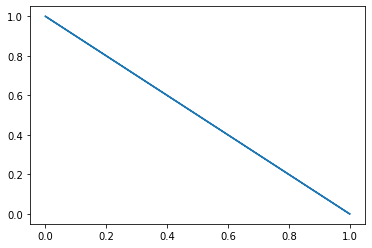

In [13]:
#Visualization of Training set v/s Predicted and Teting Set

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_test , Y_test)

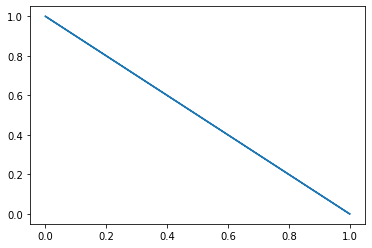

In [14]:
plt.plot(X_test,y_predict)